# Basic plots

This notebook works through an example using the CANARI-LE historical data to make various Sea Surface Temperature (SST) plots

In [7]:
# Imports the python packages used read in, analyse and plot data:

import xarray as xr  # Lets you read in data
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import glob
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Customized ensemble setup
import ensemble_setup as es

In [3]:
# Sea surface data is stored as daily data in the priority variables under the variable name tos and can be taken as the top temperature layer from votemper,
# which is stored as monthly means.
# The CANARI-LE computes years comprising of 12 months containing 30 days each, so there should be 360 days each year.
# In this example we will use the top layer from votemper.

# Make a list of all temperature files for one ensemble member:
infiles = glob.glob((es.datadir + str(es.ens[0]) + '/OCN/yearly/1950/*_votemper.nc')) # First ensemble member only, need to make a list of all files

# Lazy load data into xarray (only reads data into memory when needed):
t_data = xr.open_mfdataset(infiles)

In [4]:
# Running this is similar to doing an 'ncdump -h' on a netcdf file, it gives you the details of the data in the file:
t_data

<xarray.Dataset> Size: 6GB
Dimensions:              (time_counter: 12, axis_nbounds: 2, deptht: 75,
                          y: 1207, x: 1442, nvertex: 4)
Coordinates:
  * time_counter         (time_counter) object 96B 1950-01-16 00:00:00 ... 19...
  * deptht               (deptht) float32 300B 0.5058 1.556 ... 5.902e+03
  * y                    (y) float64 10kB 0.0 1.0 2.0 ... 1.205e+03 1.206e+03
  * x                    (x) float64 12kB 0.0 1.0 2.0 ... 1.44e+03 1.441e+03
    nav_lat              (y, x) float32 7MB dask.array<chunksize=(1207, 1442), meta=np.ndarray>
    nav_lon              (y, x) float32 7MB dask.array<chunksize=(1207, 1442), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds, nvertex
Data variables:
    time_counter_bounds  (time_counter, axis_nbounds) object 192B dask.array<chunksize=(1, 2), meta=np.ndarray>
    deptht_bounds        (deptht, axis_nbounds) float32 600B dask.array<chunksize=(75, 2), meta=np.ndarray>
    bounds_nav_lat       (y, x, nvertex) float32 28MB dask.array<chunksize=(604, 721, 2), meta=np.ndarray>
    bounds_nav_lon       (y, x, nvertex) float32 28MB dask.array<chunksize=(604, 721, 2), meta=np.ndarray>
    votemper             (time_counter, deptht, y, x) float32 6GB dask.array<chunksize=(1, 19, 302, 361), meta=np.ndarray>
Attributes: (12/35)
    Conventions:            CF-1.10
    grid_label:             gn
    nominal_resolution:     25km
    realm:                  ocean
    contact:                
    parent_source_id:       CMIP6.CMIP.MOHC.HadGEM3-GC31-MM.historical.r1i1p1f3
    ...                     ...
    title:                  [CANARI] GC3.1 N216 ORCA025 UM11.6
    license:                
    parent_experiment_id:   historical
    further_info_url:       https://github.com/NCAS-CMS/canari-data
    parent_activity_id:     
    external_variables:     areacello

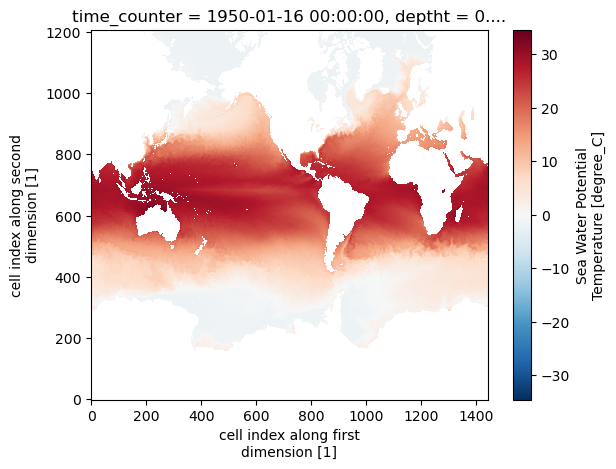

In [5]:
# Create a 2D plot of a month of SST data:
t_data['votemper'][0,0,:,:].plot()

In [6]:
# xarray is capable of doing a lot of things but if you just want to use it to read in data and then work with numpy arrays the .values let you do just that.
# The example below reads in the latitude data into a numpy array.
lat = t_data['nav_lat'].values
print(type(lat))

# values doesn't mask, to_numpy()
# Similarly if you just want to read the first time step of the surface temperature data:
sst = Tdata['votemper'][0,0,:,:].values

<class 'numpy.ndarray'>


In [ ]:
annual_mean.compute()


In [ ]:
# Compute mean over full length of simulation and all ensemble members:
infiles = glob.glob((es.datadir + str(es.ens[0]) + '/OCN/yearly/*/*_votemper.nc')) # First ensemble member only, need to make a list of all files

# Lazy load data into xarray (only reads data into memory when needed):
t_data = xr.open_mfdataset(infiles)

In [ ]:
# Reduce data to annual mean SST only:
annual_mean = Tdata.groupby('time_counter.year').mean()

In [ ]:
# Compute standard deviation of ensemble mean:
annual_std = t_data.groupby('time_counter.year').std()
annual_std.compute()

In [ ]:
# Subtract ensemble mean from each ensembe member and compute standard deviation:

In [ ]:
# Compute AMV index:

In [ ]:
# Plot forced versus internal variablility of AMV:

In [ ]:
# Save computed AMV index to it's own netcdf file:

In [ ]:
temp = t_data.isel(time_counter=500)

In [ ]:
sst = temp['votemper'].values

In [ ]:
temp.plot

In [ ]:
plt.pcolormesh(lat)

In [ ]:
# Quick plot of SST data, for the first day of one file:

# Read in SST data:
ncid = Dataset(infiles[0],'r')      # Remember python uses zero indexing so this is just looking at the first file, also the 'r' means it's read only
tos = ncid.variables['tos'][0,:,:]  # The 0 indicates were are reading in the first timestep only
ncid.close()

# Check the size of the data which has been read in:
print('The shape/size of the variable which has been read in: ' + str(np.shape(tos)))

# This plots the data:
plt.figure()
plt.pcolormesh(tos)
plt.colorbar()

In [ ]:
# Note that the above plot is simple, doesn't have lat/lon labels and uses the basic python settings.
# To do this we will use xarray, which uses netCDF4, Dataset in the background but has a lot of build in functionality.

# This loads the data in the first file.  It does a 'lazy load' and only uses up memory to store the data when it needs it.
ds_tos = xr.open_dataset(infiles[0])

In [ ]:
# By typing the name of the dataset you read in you can see information about it, kind of like an ncdump
ds_tos

In [ ]:
ts_1d = ds_tos.isel(x=30,y=10)

In [ ]:
ts_1d.plot()

In [ ]:
ts_1d